# Exploring your data
So you've just got a brand new dataset and are itching to start exploring it. But where do you begin, and how can you be sure your dataset is clean? This chapter will introduce you to the world of data cleaning in Python! You'll learn how to explore your data with an eye for diagnosing issues such as outliers, missing values, and duplicate rows.

# Diagnose data for cleaning

## Cleaning data
- Prepare data for analysis
- Data almost never comes in clean
- Diagnose your data for problems

## Common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data value

## Load your data

In [1]:
import pandas as pd
df = pd.read_csv('literacy_birth_rate.csv')

## Visually inspect

In [2]:
df.head(10)

,continent,country,female literacy,fertility,population
0,ASI,Chine,90.5,1.769,1.324655e+09
1,ASI,Inde,50.8,2.682,1.139965e+09
2,NAM,USA,99.0,2.077,3.040600e+08
3,ASI,Indonésie,88.8,2.132,2.273451e+08
4,LAT,Brésil,90.2,1.827,NaN
5,ASI,Pakistan,40.0,3.872,1.661115e+08
6,ASI,Bangladesh,49.8,2.288,1.600001e+08
7,AF,Nigéria,48.8,5.173,1.512123e+08
8,EUR,Fédération de Russie,99.4,1.393,1.419500e+08
9,ASI,Japan,99.0,1.262,1.277040e+08


In [3]:
df.tail(10)

,continent,country,female literacy,fertility,population
154,LAT,Bahamas,96.5,3.371,3.376680e+05
155,EUR,Iceland,99.0,2.093,3.174140e+05
156,ASI,Maldives,98.4,2.000,3.050270e+05
157,OCE,Vanuatu,79.5,3.883,2.338660e+05
158,OCE,Samoa,98.5,3.852,1.788690e+05
159,AF,Sao Tomé-et-Principe,83.3,3.718,1.601740e+05
160,LAT,Aruba,98.0,1.732,1.054550e+05
161,ASI,Tonga,99.1,3.928,1.035660e+05
162,OCE,Australia,96.0,1.930,2.313000e+09
163,OCE,Sweden,90.2,1.827,NaN


In [4]:
df.columns

Index(['continent', 'country', 'female literacy', 'fertility', 'population'], dtype='object')

In [5]:
df.shape

(164, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
continent          164 non-null object
country            164 non-null object
female literacy    164 non-null float64
fertility          164 non-null float64
population         162 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


# Let’s practice!

# Exploratory data analysis

## Frequency counts

- Count the number of unique values in our data

## Data type of each column


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
continent          164 non-null object
country            164 non-null object
female literacy    164 non-null float64
fertility          164 non-null float64
population         162 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


## Frequency counts: continent

In [8]:
df.continent.value_counts(dropna=False) 

AF     49
ASI    47
EUR    36
LAT    24
OCE     6
NAM     2
Name: continent, dtype: int64

In [9]:
df['continent'].value_counts(dropna=False)

AF     49
ASI    47
EUR    36
LAT    24
OCE     6
NAM     2
Name: continent, dtype: int64

## Frequency counts: country


In [10]:
df.country.value_counts(dropna=False).head()

Sweden                       2
USA                          1
Jamahiriya arabe libyenne    1
Canada                       1
Equateur                     1
Name: country, dtype: int64

## Frequency counts: fertility


In [11]:
df.fertility.value_counts(dropna=False).head() 

1.841    2
1.436    2
3.371    2
1.393    2
1.854    2
Name: fertility, dtype: int64

## Frequency counts: population


In [12]:
df.population.value_counts(dropna=False).head() 


NaN            2
 5667325.0     1
 31656865.0    1
 10622413.0    1
 12705736.0    1
Name: population, dtype: int64

## Summary statistics

- Numeric columns
- Outliers
    - Considerably higher or lower
    - Require further investigation

## Summary statistics: Numeric data


In [13]:
df.describe()

,female literacy,fertility,population
count,164.000000,164.000000,1.620000e+02
mean,80.265854,2.866476,5.377985e+07
std,22.957409,1.423089,2.272193e+08
min,12.600000,0.966000,1.035660e+05
25%,66.675000,1.825750,3.368292e+06
50%,90.200000,2.361000,9.707404e+06
75%,98.500000,3.874750,2.882991e+07
max,100.000000,7.069000,2.313000e+09


---
# Let’s practice!

---
# Visual exploratory data analysis

## Data visualization
- Great way to spot outliers and obvious errors
- More than just looking for pa!erns
- Plan data cleaning steps

## Summary statistics


In [14]:
df.describe()

,female literacy,fertility,population
count,164.000000,164.000000,1.620000e+02
mean,80.265854,2.866476,5.377985e+07
std,22.957409,1.423089,2.272193e+08
min,12.600000,0.966000,1.035660e+05
25%,66.675000,1.825750,3.368292e+06
50%,90.200000,2.361000,9.707404e+06
75%,98.500000,3.874750,2.882991e+07
max,100.000000,7.069000,2.313000e+09


## Bar plots and histograms
- Bar plots for discrete data counts
- Histograms for continuous data counts
- Look at frequencies

## Histogram

In [15]:
import matplotlib.pyplot as plt 

df.population.plot('hist')
plt.show()

## Identifying the error

```python
df[df.population > 1000000000]

	continent	country	female literacy	fertility	population
0	ASI	    Chine	    90.5	1.769	            1.324655e+09
1	ASI    	Inde	    50.8	2.682	             1.139965e+09
162	OCE	    Australia	96.0	1.930	          2.313000e+09

```


- Not all outliers are bad data points
- Some can be an error, but others are valid values


In [16]:
df[df.population > 1000000000]

,continent,country,female literacy,fertility,population
0,ASI,Chine,90.5,1.769,1.324655e+09
1,ASI,Inde,50.8,2.682,1.139965e+09
162,OCE,Australia,96.0,1.930,2.313000e+09


## Box plots

- Visualize basic summary statistics
    - Outliers
    - Min/max
    - 25th, 50th, 75th percentiles

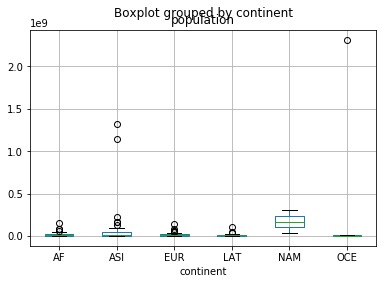

In [19]:
df.boxplot(column='population', by='continent')
plt.show()

## Scatter plots
- Relationship between 2 numeric variables
- Flag potentially bad data
    - Errors not found by looking at 1 variable

---
# Let’s practice!
